# Input parameters

In [1]:
import numpy as np
import math  # Use math.factorial for individual calculations

# Parameters
lambda_ = 5.0
k_values = np.arange(0, 11)  # k = 0 to 10

# Calculate Poisson probabilities using list comprehension
poisson_probs = [np.exp(-lambda_) * (lambda_ ** k) / math.factorial(k) for k in k_values]

print(poisson_probs)



[np.float64(0.006737946999085467), np.float64(0.03368973499542734), np.float64(0.08422433748856833), np.float64(0.14037389581428056), np.float64(0.1754673697678507), np.float64(0.1754673697678507), np.float64(0.1462228081398756), np.float64(0.104444862957054), np.float64(0.06527803934815875), np.float64(0.03626557741564375), np.float64(0.01813278870782187)]


In [2]:
from dataclasses import dataclass

@dataclass
class InputParameters:
    flux: float
    pixel_area: float
    frame_duration: float
    
    def get_summary(self) -> str:
        """Return a summary of the stored data."""
        return f"Flux [cm^{-2}.s^{-1}]: {self.flux}, Pixel Area: {self.pixel_area}, Frame Duration [s]: {self.frame_duration}"
        
    def calculate_flux_area_product(self) -> float:
        """Calculate the product of flux and pixel area. This is the average number of particles hitting the pixel per second."""
        return self.flux * self.pixel_area

    def calculate_flux_area_frame_duration_product(self) -> float:
        """Calculate the product of flux by pixel area by frame duration. This is the average number of particles hitting the pixel per frame."""
        return self.flux * self.pixel_area * self.frame_duration

    def calculate_pixel_occupancy(self) -> float:
        """Calculate the pixel occupancy, which is the probability of having at least one particle hitting the pixel during the frame duration."""
        lambda_pixel = self.calculate_flux_area_frame_duration_product()
        return 1 - np.exp(-lambda_pixel)

    def calculate_pixel_entropy(self) -> float:
        """Calculate the entropy of the pixel occupancy. This is H = -p*log2(p) - (1-p)*log2(1-p)"""
        occupancy = self.calculate_pixel_occupancy()
        if occupancy == 0 or occupancy == 1:
            return 0.0
        return -occupancy * np.log2(occupancy) - (1 - occupancy) * np.log2(1 - occupancy)

    def calculate_entropy_per_cm2(self) -> float:
        """Calculate the entropy per cm^2."""
        return self.calculate_pixel_entropy() / self.pixel_area

    def calculate_entropy_per_cm2_per_s(self) -> float:
        """Calculate the entropy per cm^2 per second."""
        return self.calculate_entropy_per_cm2() / self.frame_duration


        

In [3]:
# Create an instance of the class
inputParameters = InputParameters(flux=1e8, pixel_area=1e-6, frame_duration=1e-7)

# Get a summary
print(inputParameters.get_summary())

# Call direct method
print(inputParameters)

# calculate Entropy per cm2 per second
pixel_occupancy = inputParameters.calculate_pixel_occupancy()
print(f"Pixel Occupancy: {pixel_occupancy}")
pixel_entropy = inputParameters.calculate_pixel_entropy()
print(f"Pixel Entropy: {pixel_entropy}")
entropy_per_cm2 = inputParameters.calculate_entropy_per_cm2()
print(f"Entropy per cm^2: {entropy_per_cm2}")
entropy_per_cm2_per_s = inputParameters.calculate_entropy_per_cm2_per_s()
print(f"Entropy per cm^2 per second: {entropy_per_cm2_per_s}")



Flux [cm^-2.s^-1]: 100000000.0, Pixel Area: 1e-06, Frame Duration [s]: 1e-07
InputParameters(flux=100000000.0, pixel_area=1e-06, frame_duration=1e-07)
Pixel Occupancy: 9.999950000172397e-06
Pixel Entropy: 0.000180522452539646
Entropy per cm^2: 180.522452539646
Entropy per cm^2 per second: 1805224525.39646


In [4]:
# Define a range of flux values
flux_values = [1e6, 2e6, 5e6, 1e7, 2e7, 5e7, 1e8]  # Example range of flux values

# Empty list to store results
entropy_results = []

# Loop over the flux values
for flux in flux_values:
    # Update the flux field of the InputParameters instance
    inputParameters.flux = flux
    
    # Calculate entropy per cm^2 per second
    entropy_per_cm2_per_s = inputParameters.calculate_entropy_per_cm2_per_s()
    
    entropy_results.append((flux, entropy_per_cm2_per_s))
    
# Print the results
for flux, entropy in entropy_results:
    print(f"Flux: {flux}, Entropy per cm^2 per second: {entropy}")

Flux: 1000000.0, Entropy per cm^2 per second: 24696190.458980605
Flux: 2000000.0, Entropy per cm^2 per second: 47392378.67579987
Flux: 5000000.0, Entropy per cm^2 per second: 111871290.07230066
Flux: 10000000.0, Entropy per cm^2 per second: 213742529.22768816
Flux: 20000000.0, Entropy per cm^2 per second: 407484864.7172601
Flux: 50000000.0, Entropy per cm^2 per second: 952614394.2303113
Flux: 100000000.0, Entropy per cm^2 per second: 1805224525.39646


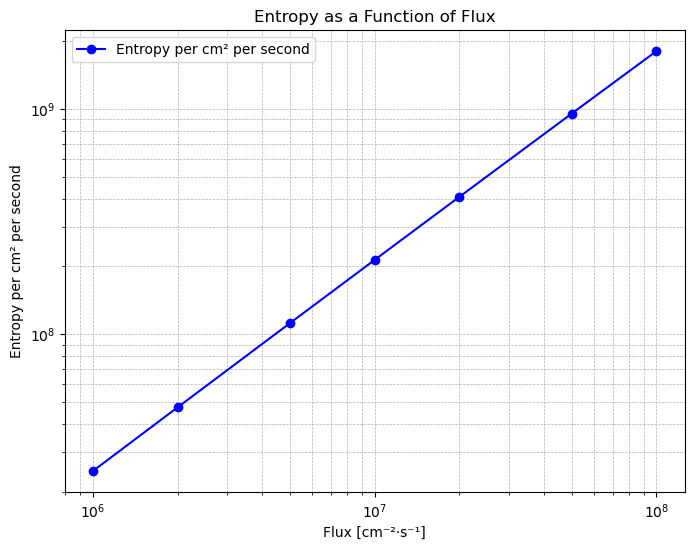

In [ ]:
import matplotlib.pyplot as plt

# Extract flux and entropy values from the list of tuples
flux_values, entropy_values = zip(*entropy_results)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(flux_values, entropy_values, marker='o', linestyle='-', color='b', label='Entropy per cm² per second')

# Add labels, title, and legend
plt.xlabel('Flux [cm⁻²·s⁻¹]')
plt.ylabel('Entropy per cm² per second [bit/s/cm²]')
plt.title('Entropy as a Function of Flux')
plt.xscale('log')  # Use a logarithmic scale for flux if needed
plt.yscale('log')  # Use a logarithmic scale for entropy if needed
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.show()